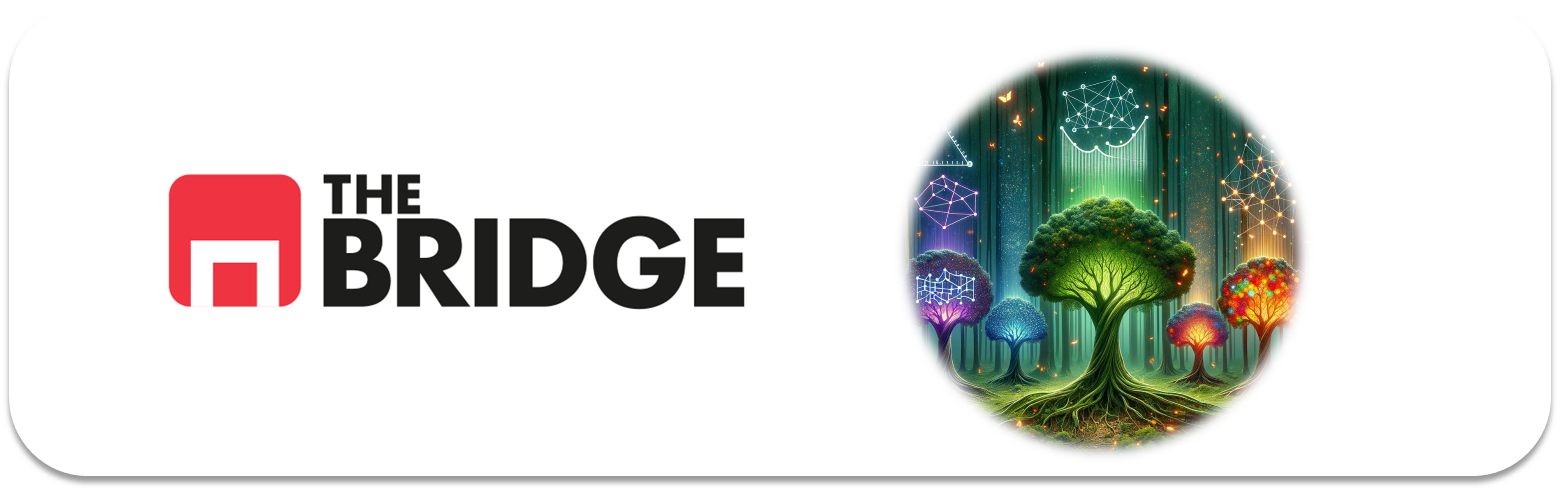

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [28]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [29]:
#obtener datos
df=pd.read_csv("./diabetes.csv")

In [30]:
#ojeo de los datos
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
target="Outcome"

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


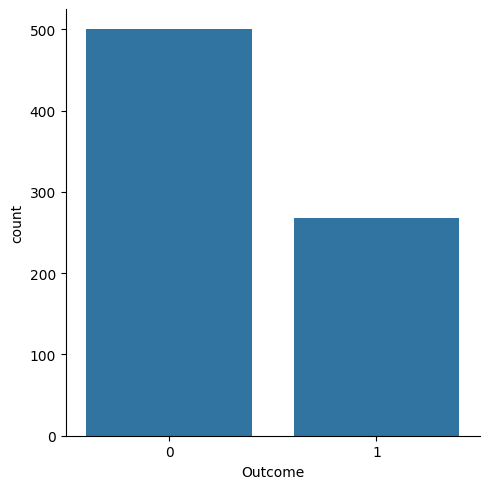

In [33]:

sns.catplot(x = 'Outcome', kind = 'count', data = df);

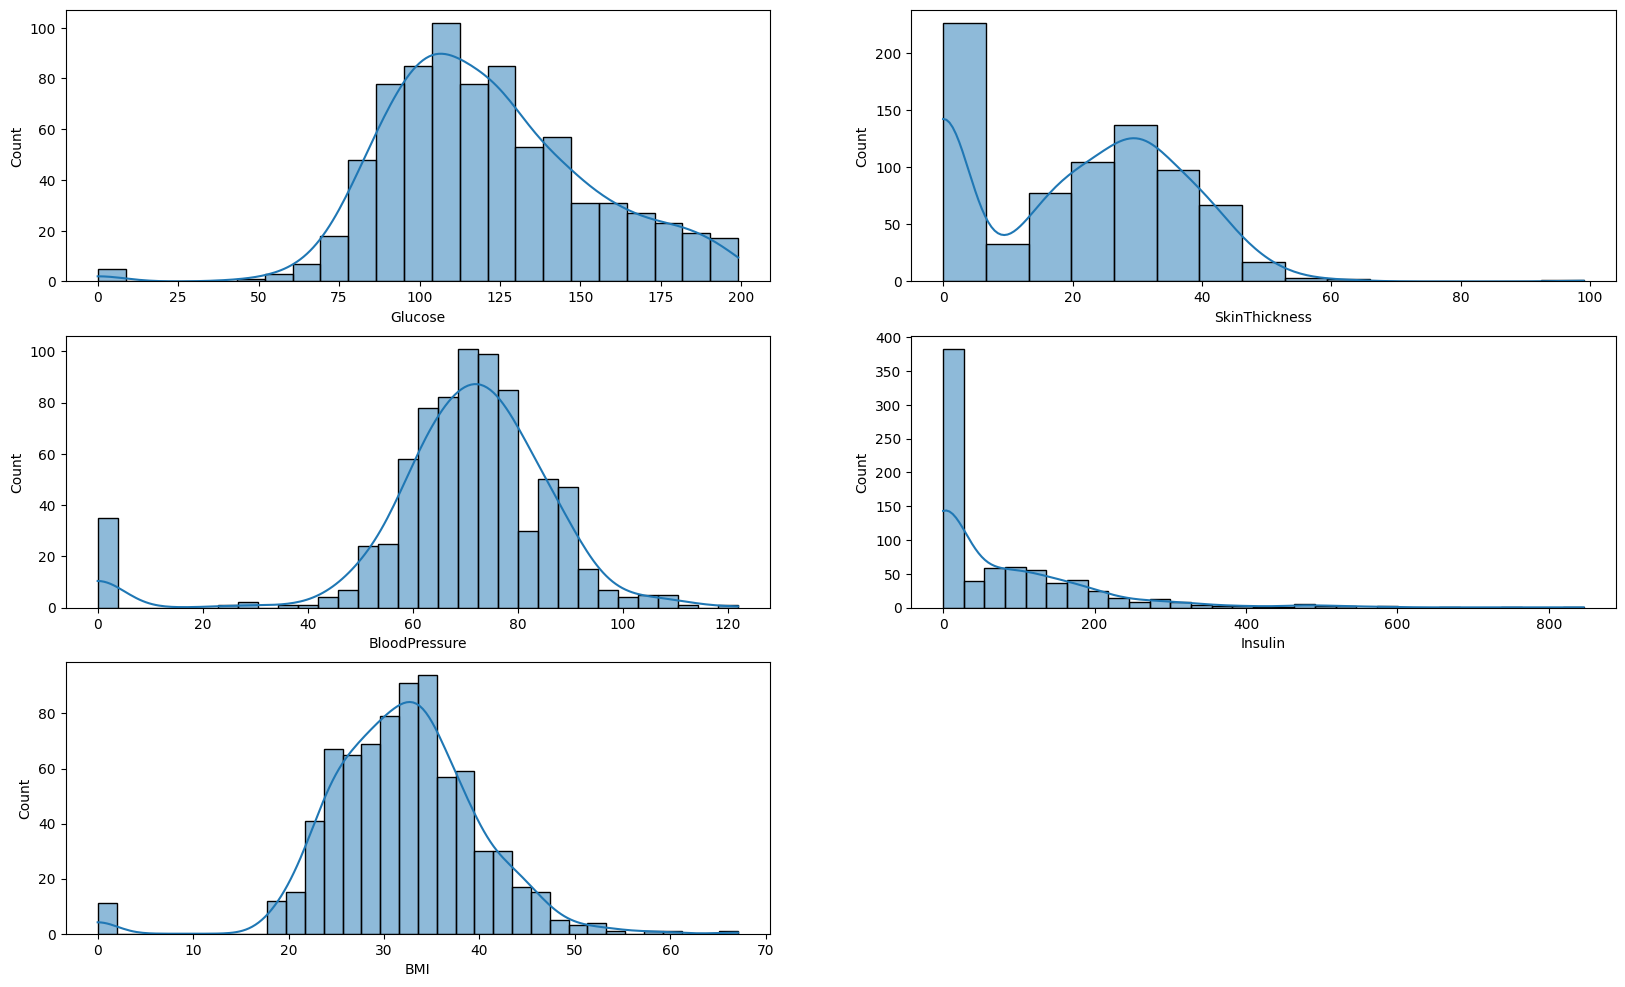

In [34]:
plt.figure(figsize=[20,12])
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
sns.histplot(data= df, x='Glucose', kde=True, ax=ax1)
sns.histplot(data= df, x='SkinThickness', kde=True, ax=ax2)
sns.histplot(data= df, x='BloodPressure', kde=True, ax=ax3)
sns.histplot(data= df, x='Insulin', kde=True, ax=ax4)
sns.histplot(data= df, x='BMI', kde=True, ax=ax5)
plt.show()



veo muchos datos a 0 que deben de ser nulos

In [35]:
#limpieza
duplicados=df.duplicated()
duplicados.value_counts(True)


False    1.0
Name: proportion, dtype: float64

In [36]:
#Train/test spliting
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

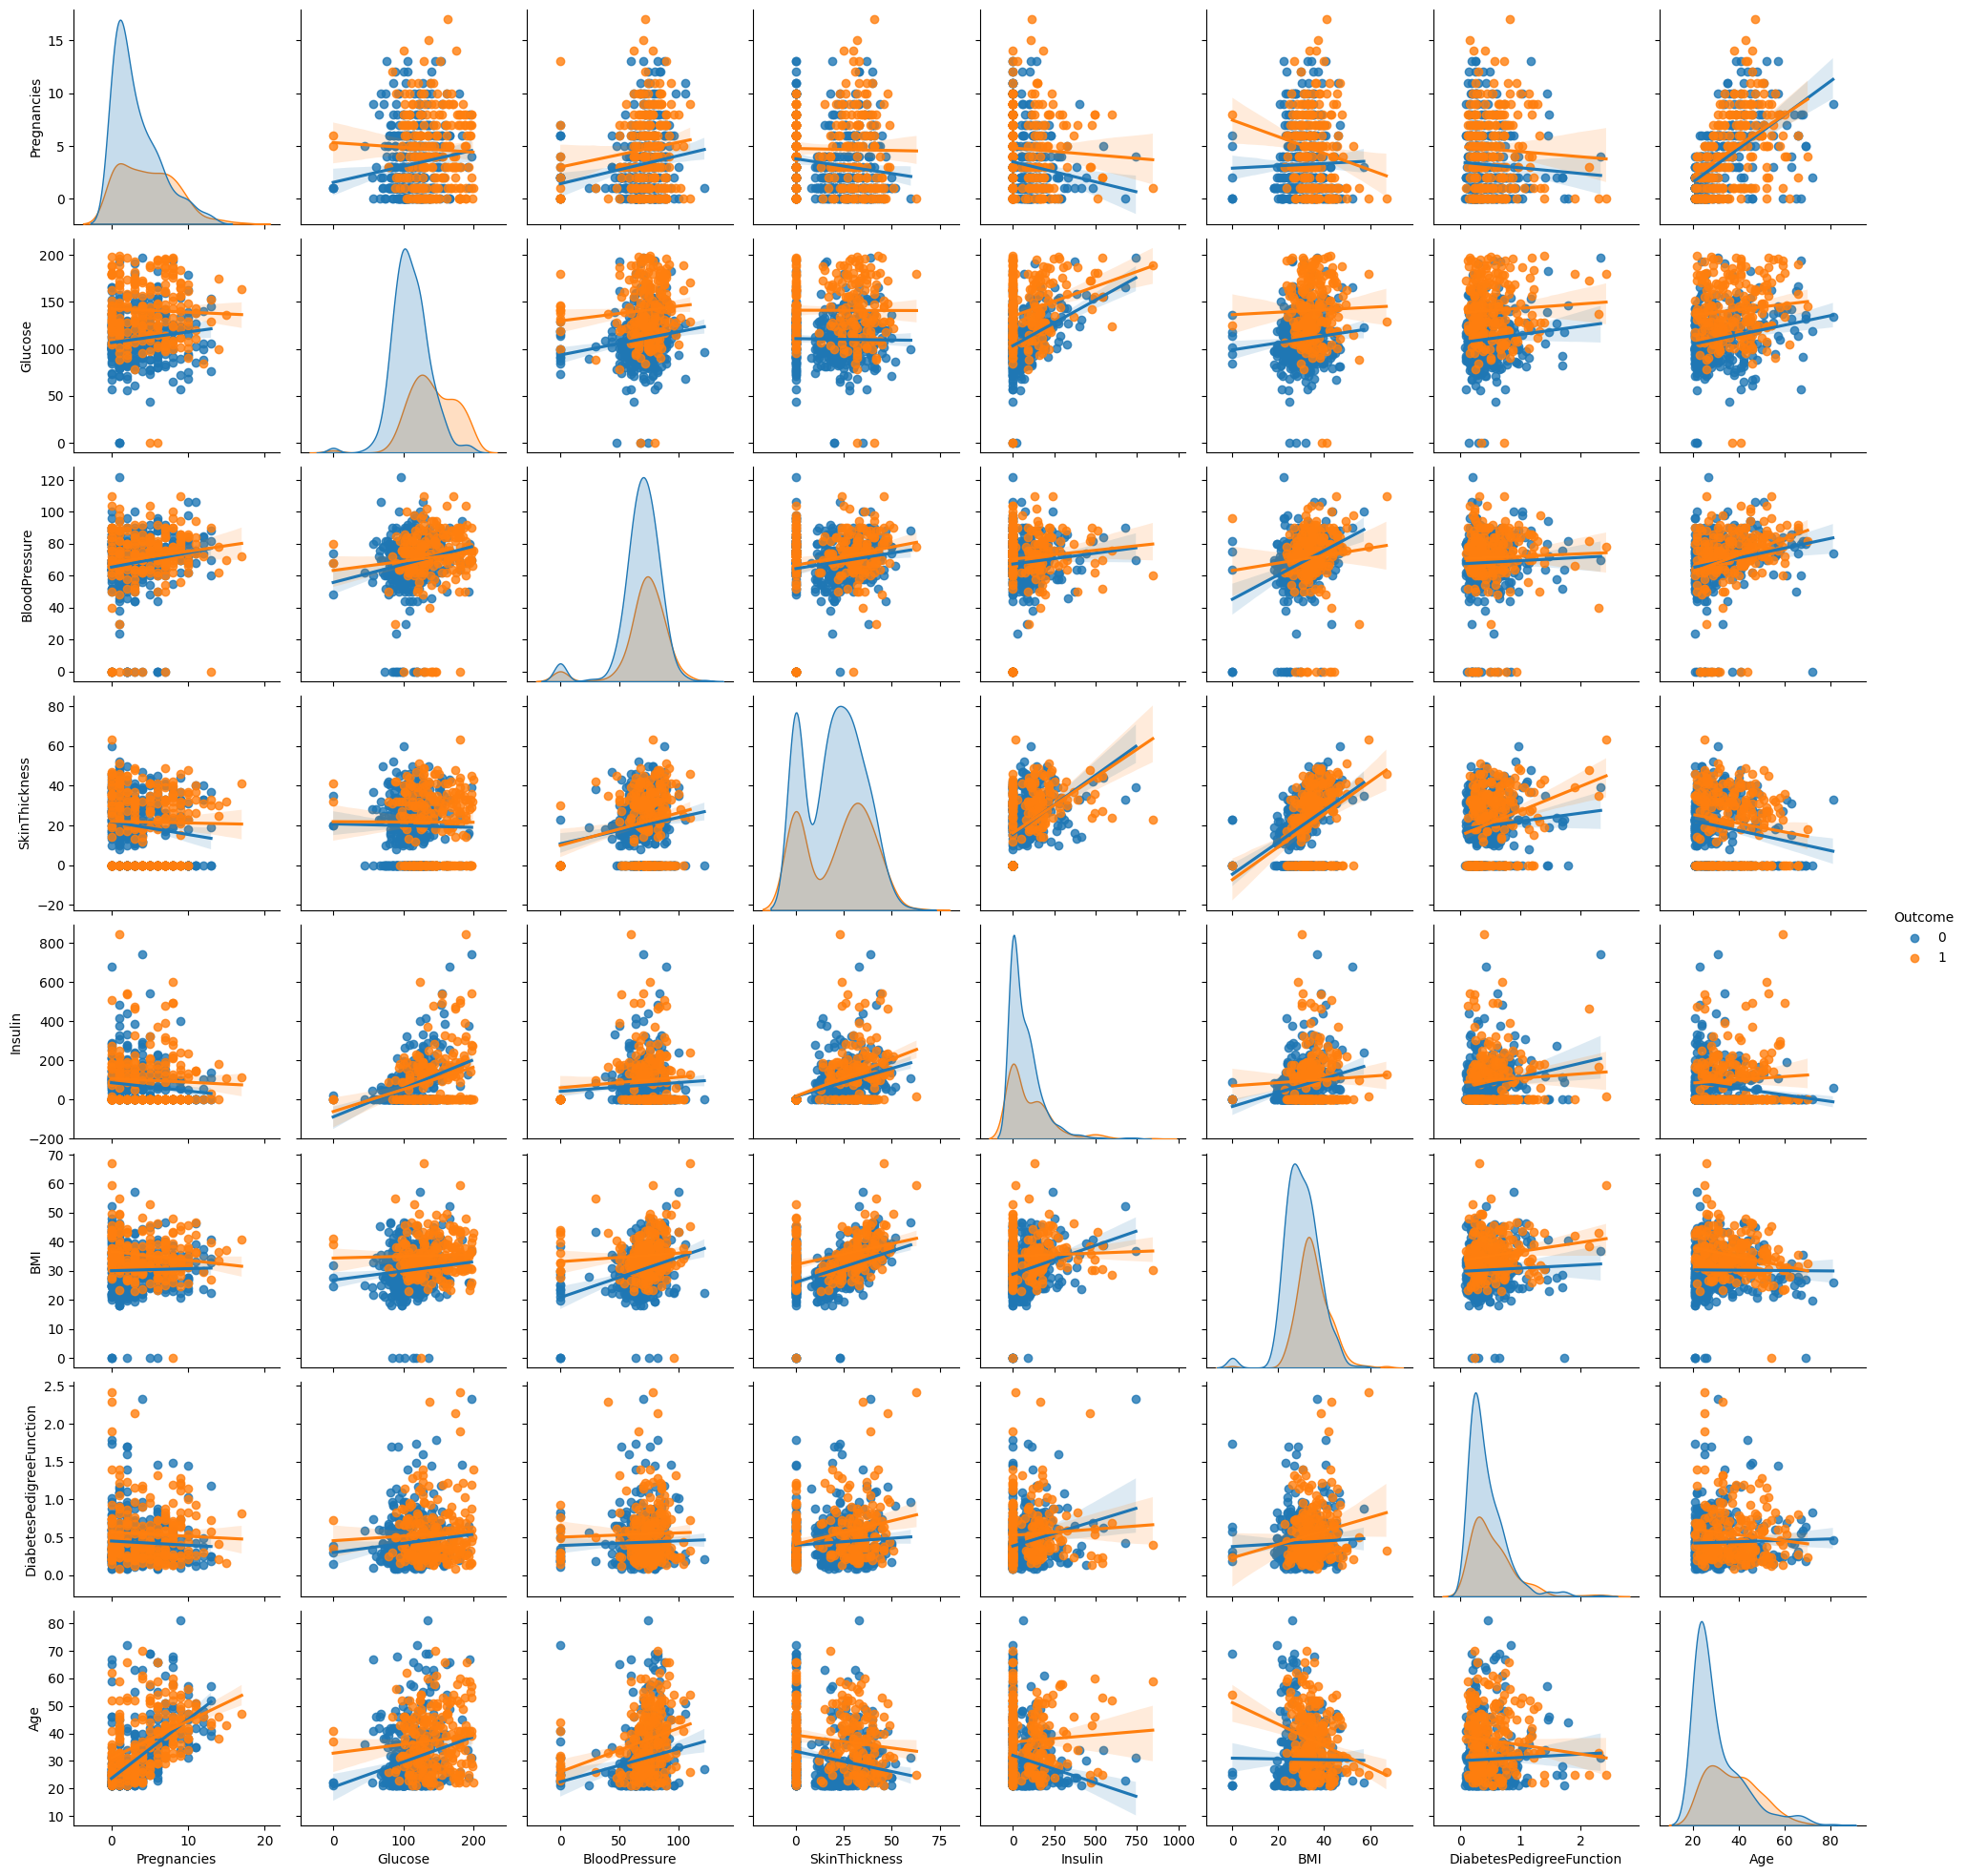

In [37]:
#Mini EDA
'''
plt.figure(figsize=[15,8])
sns.pairplot(data=train_set, kind='reg', hue='Outcome')
plt.show();
'''

In [38]:
correlaciones_absolutas = np.abs(train_set.corr(numeric_only= True)["Outcome"])
correlaciones_ordenadas = correlaciones_absolutas.sort_values(ascending=False)
correlaciones_ordenadas

Outcome                     1.000000
Glucose                     0.456117
BMI                         0.306335
Age                         0.280654
Pregnancies                 0.207550
DiabetesPedigreeFunction    0.154560
Insulin                     0.108498
BloodPressure               0.082046
SkinThickness               0.057912
Name: Outcome, dtype: float64

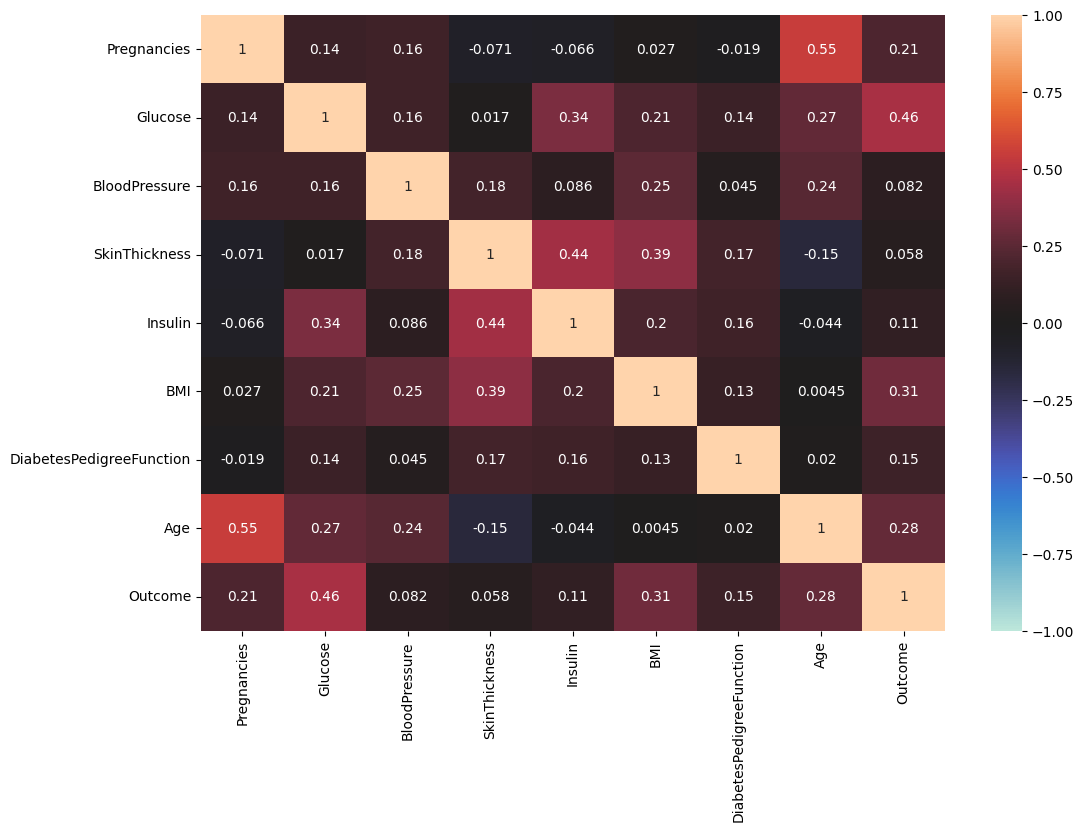

In [39]:
plt.figure(figsize=[12,8])
sns.heatmap(train_set.corr(), annot=True, vmin=-1, vmax=1, center= 0)
plt.show()

In [40]:
#Construyo las parejas X,y de train y test.
y_train=train_set["Outcome"]
y_test=test_set["Outcome"]
X_train=train_set.drop("Outcome",axis=1)
X_test=test_set.drop("Outcome",axis=1)

In [41]:
#Tratamiento de features
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#MODELADO

In [42]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=500,
                                max_depth=4,
                                random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



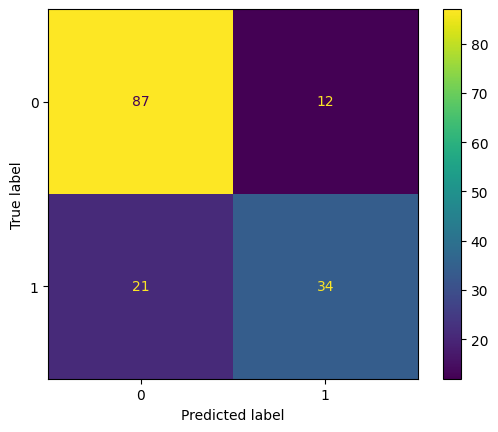

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

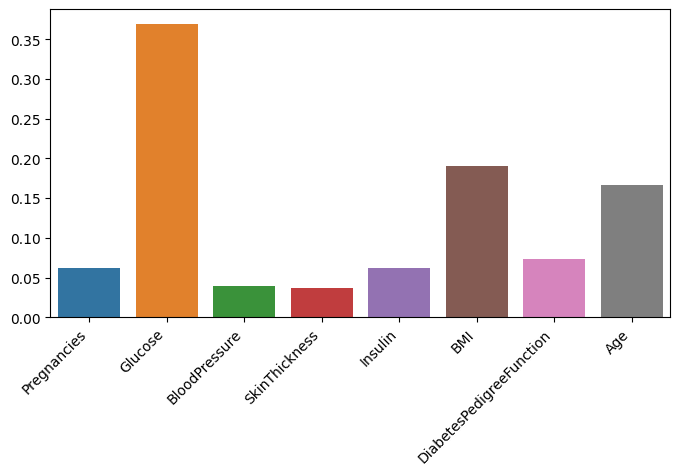

In [50]:
train_set_2=train_set.drop(columns="Outcome")
classes = train_set_2.columns.values.tolist()

plt.figure(figsize=(8, 4))
sns.barplot(x=classes, y=rf_model.feature_importances_, hue = classes)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show;

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



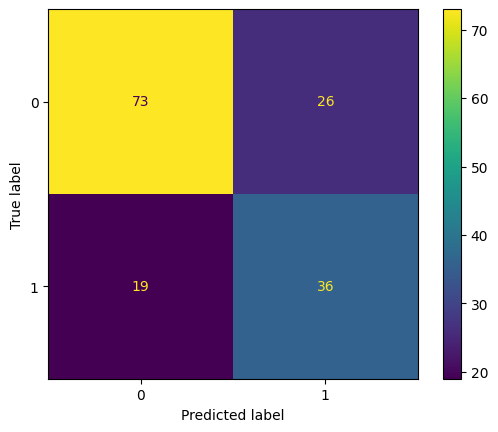

In [52]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state = 42)
xgb_clf.fit(X_train, y_train)
y_pred_rf = xgb_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



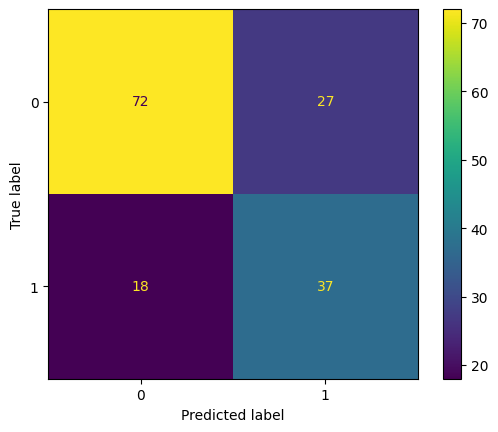

In [54]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb)
print(classification_report(y_test, y_pred_lgb))


In [55]:
#CON TUNEO


rf_model_tunning= RandomForestClassifier()

param_grid= {'n_estimators': list(range(20,41,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy']}

rf_grid= GridSearchCV(rf_model_tunning, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
rf_grid.fit(X_train, y_train)



Fitting 25 folds for each of 756 candidates, totalling 18900 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6300 fits failed out of a total of 18900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6300 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/pytho

GridSearchCV(cv=25, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29, 30, 31, 32, 33, 34, 35, 36, 37,
                                          38, 39, 40]},
             verbose=True)

In [56]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 25}

In [57]:
rf_grid.best_score_

0.7832000000000001

In [58]:
best_model = rf_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



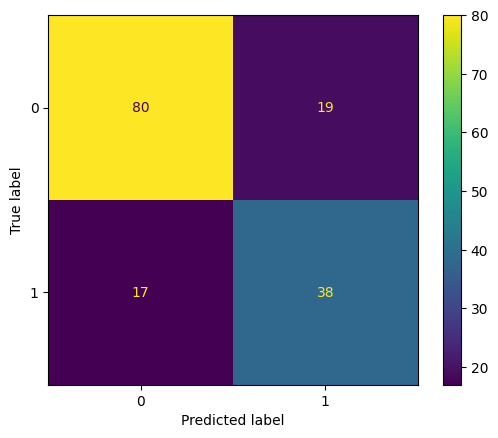

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))
print(classification_report(y_test, best_model.predict(X_test)))

**OTRO ENFOQUE**

In [60]:
df2=pd.read_csv("./diabetes.csv")

In [61]:
df2.replace({'Glucose': 0, 'BloodPressure': 0, 'BMI': 0, 'SkinThickness' : 0, 'Insulin' : 0}, np.nan, inplace=True)

In [62]:
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace = True)
df2['Glucose'].fillna(df2['Glucose'].median(), inplace = True)
df2['BMI'].fillna(df2['BMI'].median(), inplace = True)
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace = True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace = True)



In [63]:
train_set, test_set = train_test_split(df2, test_size= 0.2, random_state= 42)

In [64]:
y_train=train_set["Outcome"]
y_test=test_set["Outcome"]
X_train=train_set.drop("Outcome",axis=1)
X_test=test_set.drop("Outcome",axis=1)

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train2=scaler.transform(X_train)
X_test2=scaler.transform(X_test)

In [67]:
rf_model_tunning= RandomForestClassifier()

param_grid= {'n_estimators': list(range(20,41,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy']}

rf_grid= GridSearchCV(rf_model_tunning, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
rf_grid.fit(X_train2, y_train)

Fitting 25 folds for each of 756 candidates, totalling 18900 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6300 fits failed out of a total of 18900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3048 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/pytho

GridSearchCV(cv=25, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29, 30, 31, 32, 33, 34, 35, 36, 37,
                                          38, 39, 40]},
             verbose=True)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



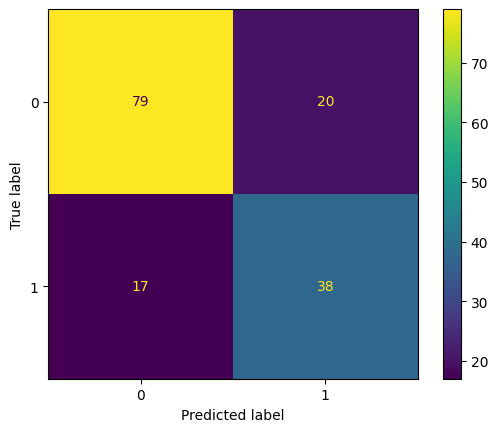

In [68]:
best_model = rf_grid.best_estimator_
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))
print(classification_report(y_test, best_model.predict(X_test)))